# Developing `Fraud Detection` model on transaction history for a financial company dataset

## About Dataset:

### Context:

##### This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

### Data Dictionary:

##### step -- maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
##### type -- CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
##### amount -- amount of the transaction in local currency.
##### nameOrig -- customer who started the transaction
##### oldbalanceOrg -- initial balance before the transaction
##### newbalanceOrig -- new balance after the transaction
##### nameDest -- customer who is the recipient of the transaction
##### oldbalanceDest -- initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
##### newbalanceDest -- new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
##### isFraud -- This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
##### isFlaggedFraud -- The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Expectations:

##### 1.    Data cleaning including missing values, outliers and multi-collinearity.
##### 2.    Describe your fraud detection model in elaboration.
##### 3.    How did you select variables to be included in the model?
##### 4.    Demonstrate the performance of the model by using best set of tools.
##### 5.    What are the key factors that predict fraudulent customer?
##### 6.    Do these factors make sense? If yes, How? If not, How not?
##### 7.    What kind of prevention should be adopted while company update its infrastructure?
##### 8.    Assuming these actions have been implemented, how would you determine if they work?

## Pre-processing the data and perfroming Data Wrangling

In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings # for ignoring any warnings
warnings.filterwarnings('ignore') # to ignore warnings
import seaborn as sb
sb.set(style='white', color_codes=True) # some styling parameters
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df=pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [5]:
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362520,735,TRANSFER,417103.68,C336307904,417103.68,0.0,C1155915285,0.00,0.00,1,0
6362521,735,CASH_OUT,417103.68,C1450763584,417103.68,0.0,C1377830519,34232.06,451335.75,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
6362523,735,CASH_OUT,92735.71,C786761311,92735.71,0.0,C570188819,921583.30,1014319.01,1,0
6362524,735,TRANSFER,123146.28,C1625883009,123146.28,0.0,C918154390,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


## Performing Data Analysis

In [6]:
# Checking null values (if any)

df.isnull().values.any()

False

In [7]:
# Checking information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### From above analysis, we can determine -- it is a large Dataset with NO NULL values and size over 500MB. This would take some time to train for a normal GPU.

In [8]:
valid=len(df[df.isFraud==0])
fraud=len(df[df.isFraud==1])
valid_percent=(valid / (fraud + valid)) * 100
fraud_percent=(fraud / (fraud + valid)) * 100

print("Number of Valid transactions: ", valid)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Valid transactions: {:.4f} %".format(valid_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Valid transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Valid transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


### These results prove that the given data is a highly unbalanced data as `Percentage of Valid transactions = 99.88%` and `Percentage of Fraud transactions = 0.12%`.
### We will use `DECISION TREE` and `RANDOM FOREST` algorithms as Tree-based algorithms often perform well / effective methods on imbalanced datasets. 

In [9]:
# Finding Merchants transactions

T=df[df['nameDest'].str.contains('M')]
T.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
228,1,PAYMENT,7452.89,C214649627,102397.0,94944.11,M67730604,0.0,0.0,0,0
229,1,PAYMENT,3930.81,C15477956,6032.0,2101.19,M710623214,0.0,0.0,0,0
234,1,PAYMENT,6926.67,C751021317,152927.0,146000.33,M1896552614,0.0,0.0,0,0
235,1,PAYMENT,893.57,C294658299,10676.0,9782.43,M1033856359,0.0,0.0,0,0


### We can identify that for merchants, there is no information regarding the attribites `oldbalanceDest` and `newbalanceDest`.

## Moving forward with Data Visualization

### Correlation Heatmap

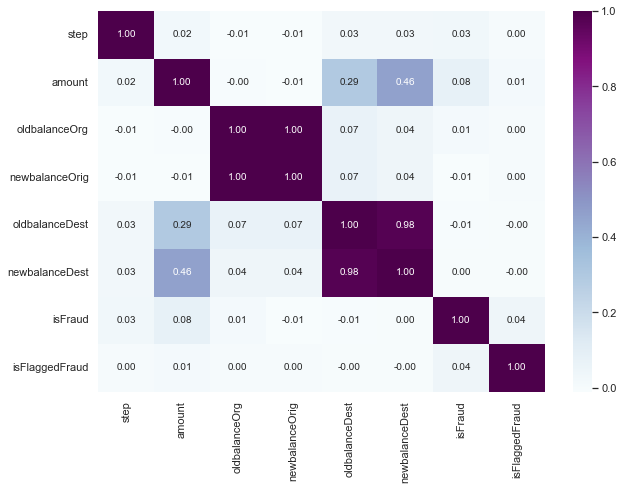

In [10]:
corr=df.corr()
plt.figure(figsize=(10,7))
sb.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f") # fmt is used to count until 2 decimal places
plt.show()

## Finding no. of VALID vs. FRAUD transactions

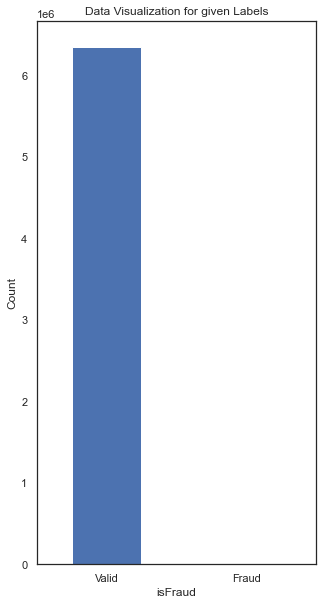

In [11]:
plt.figure(figsize=(5,10))
labels=["Valid", "Fraud"]
count_classes=df.value_counts(df['isFraud'], sort=True)
count_classes.plot(kind="bar", rot=0)
plt.title("Data Visualization for given Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## Moving on to the further development and problem solving

In [12]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
new_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## Handling categorical variables using Label Encoding

In [14]:
# Checking which attributes are dtype: object

objList=new_df.select_dtypes(include="object").columns
print(objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


### There are three `attributes` with `Object Datatype`. Thus we need to `label encode` them in order to check `multi-colinearity`

In [15]:
#Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for feat in objList:
    new_df[feat]=le.fit_transform(new_df[feat].astype(str))

print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


## Checking Multicollinearity

In [16]:
# Importing library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


### From the above observation, we can see that `oldbalanceOrg` and `newbalanceOrig` have too high VIF thus they are `highly correlated`. Similarly `oldbalanceDest` and `newbalanceDest` are `highly correlated`. Lastly, `nameDest` is correlated to `nameOrig`.
### Thus, combining these pairs of `collinear attributes` and `drop` the individual ones.

In [17]:
# Combining collinear attributes

new_df['Actual_amount_orig']=new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest']=new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath']=new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

# Dropping the individual columns

new_df=new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


## New Correlation Heatmap

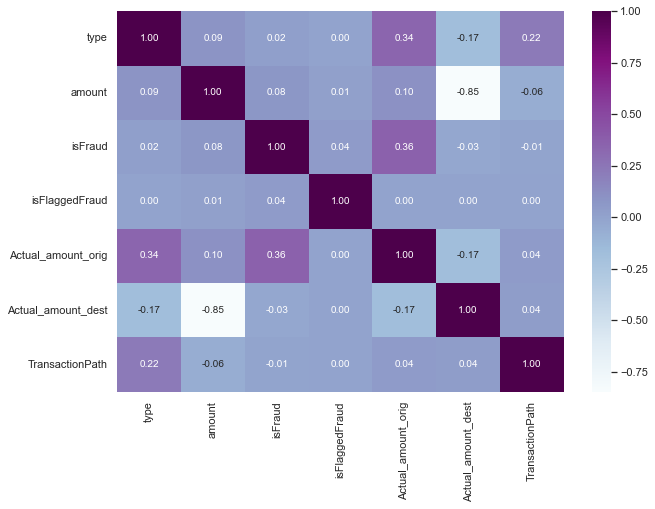

In [18]:
corr=new_df.corr()

plt.figure(figsize=(10,7))
sb.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f") # fmt is used to count until 2 decimal places
plt.show()

## Proceeding with Model Building

In [19]:
# Importing essentital Machine Learning libraries

from sklearn.preprocessing import StandardScaler # importing StandardScaler
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor -- ensemble technique
from sklearn.ensemble import RandomForestRegressor # importing RandomForestRegressor -- ensemble technique
from sklearn.ensemble import RandomForestClassifier # importing RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # importing GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb # importing XGBoost
from xgboost import XGBClassifier # importing XGBClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Performing Normalizing / Scaling operation on `Amount`

In [20]:
# Performing Scaling
scaler=StandardScaler()
new_df["NormalizedAmount"]=scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y=new_df["isFraud"]
X=new_df.drop(["isFraud"], axis= 1)

### Performed normalization on ONLY `sample` and NOT `complete` dataset as it may lead to decrease in accuracy of model.

In [21]:
# Performing Train-Test-Split operation

# Split the data
(X_train, X_test, Y_train, Y_test)=train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


## Proceeding with Model Training

In [22]:
# Decision Tree Algo

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt=decision_tree.predict(X_test)
decision_tree_score=decision_tree.score(X_test, Y_test) * 100

In [23]:
# Random Forest Algo

random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred_rf=random_forest.predict(X_test)
random_forest_score=random_forest.score(X_test, Y_test) * 100

In [24]:
# Printing accuracy scores for above classifiers algos

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.922725753437
Random Forest Score:  99.95876960539316


In [25]:
# Key values of Confusion Matrix - Decision Tree

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------")

# Key values of Confusion Matrix - Random Forest

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1715
False Positives: 755
True Negatives: 1905596
False Negatives: 720
----------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1713
False Positives: 65
True Negatives: 1906286
False Negatives: 722


### By analyzing between `Decision Tree` and `Random Forest`, we get the following result:

#### TP(Decision Tree) ~ TP(Random Forest) - they are equal / same.
#### FP(Decision Tree) >> FP(Random Forest) - `Random Forest` has an edge over `Decision Tree`.
#### TN(Decision Tree) < TN(Random Forest) - `Random Forest` is better.
#### FN(Decision Tree) ~ FN(Random Forest) - they are equal / same.

### Hence `Random Forest algo` is better to use as it has slight edge over `Decision Tree`.

In [26]:
# Confusion Matrix - Decision Tree

confusion_matrix_dt=confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("---------------------------------")

# Confusion Matrix - Random Forest

confusion_matrix_rf=confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905596     755]
 [    720    1715]]
---------------------------------
Confusion Matrix - Random Forest
[[1906286      65]
 [    722    1713]]


In [27]:
# Classification report - Decision Tree

classification_report_dt=classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("------------------------------------------------------")

# classification report - Random Forest

classification_report_rf=classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



### There is a good precision and F1-Score, hence, `Random Forest` is better suited

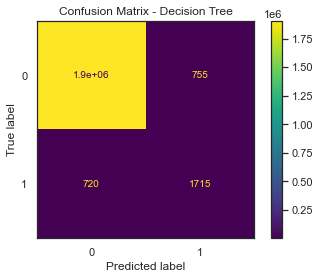

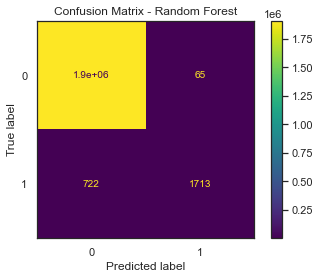

In [28]:
# Visualizing confusion matrix - Decision Tree

disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Visualizing confusion matrix - Random Forest

disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

## AUC ROC for Decision Tree

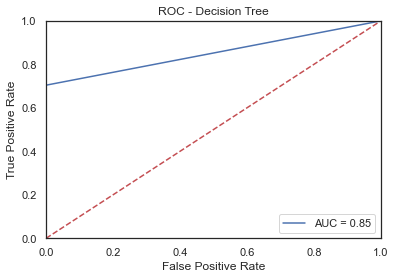

In [29]:
# Calculate the FPR and TPR for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc=metrics.auc(fpr, tpr)

plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AUC ROC for Random Forest

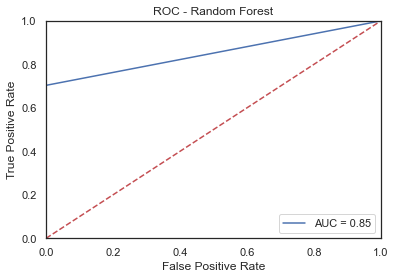

In [30]:
# Calculate the FPR and TPR for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc=metrics.auc(fpr, tpr)

plt.title('ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### From above observation, the AUC for both `Decision Tree` and `Random Forest` is equal, hence both models can be used.

## Conclusion:

### We have seen that `accuracy` of both `Random Forest` and `Decision Tree` is equal, however, the precision of `Random Forest` is slightly good as compared to `Decision Tree`. As we know, in a `fraud detection model`, Precision is highly important. The reason behind it is rather than predicting normal transactions correctly we want `fraud transactions` to be predicted correctly and `valid` to be left off. Hence, if either of the two reasons above are NOT fulfiiled, we may trap the innocent and leave the felon.

### Expectations Deliverables:

##### 1.    Data cleaning including missing values, outliers and multi-collinearity.
    --->> Done
##### 2.    Describe your fraud detection model in elaboration.
    --->> I have performed data analysis, visualization, statistical methods to identify the dataset and concluded that to use Random Forest and Decision Tree algos.
    --->> Reason 1: As presicion is what we're looking for and other algos may give us the prediction but the above two gave good presicion. Random Forest was slightly better than Decision Tree.
    --->> Reason 2: As the given dataset was highly unbalanced (Valid=99.88% vs. Fraud=0.12%).
##### 3.    How did you select variables to be included in the model?
    --->> I have used the VIF values and Correlation heatmap as I have to check if there are any two attributes highly correlated to each other and then dropping the one which is less correlated to the isFraud attribute.
##### 4.    Demonstrate the performance of the model by using best set of tools.
    --->> The Random Forest algo makes multiple decision trees which makes it easier for model to understand the data in a simpler way. The Decision Tree makes decision tree in a boolean way. However, note that, Random Forest takes time (I have to restart the kernel twice) to load the performance compare to Decision Tree.
##### 5.    What are the key factors that predict fraudulent customer?
    --->> i. The source of request is secured or not and from a genuine IP.
    --->> ii. Is the name of organisation asking for money is legitimate or not.
    --->> iii. Analyzing the transaction history of vendors.
##### 6.    Do these factors make sense? If yes, How? If not, How not?
    --->> Yes, we can determine and keep track of the activity and transactions.
##### 7.    What kind of prevention should be adopted while company update its infrastructure?
    --->> i. Use ONLY bank vertified apps and say NO to 3rd party apps.
    --->> ii. Browse ONLY through bank verified secured websites.
    --->> iii. Use secured internet connections / VPN connection.
    --->> iv. Never to respond or access to unauthorized calls / SMS / spam e-mails.
##### 8.    Assuming these actions have been implemented, how would you determine if they work?
    --->> Ask banks to send E-statements or confirmation email / text.